# Red Wine Quality Prediction Project 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Loading The Dataset

In [2]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

#### First 5 Rows of the dataset

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.shape

(1599, 12)

The dataset is having 1599 rows and 12 columns.

### Exploratory Data Analysis(EDA)

In [5]:
#getting the information from the dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above we can see there are no null values present in the dataset and can see different datatypes.

In [6]:
# checking for the missing values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From above we can see there are no missing values present in it.

### Statistical analysis of the dataset

In [7]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The summary of the dataset looks perfect since there is no negative/invalid values present in it.
the observations we make from the above are as follows:--
1. The counts of all the columns are same i.e,1599 which means there are no missing values present in it.
2. There is a big gap between 75% and max values of residual sugar column.
3. There is a big gap between 75% and max values of free sulfur dioxide column.
4. There is a huge gap between 75% and max value of total sulfur dioxide column.

All these gaps indicate that there are outliers may be present in our dataset which might need to be treated

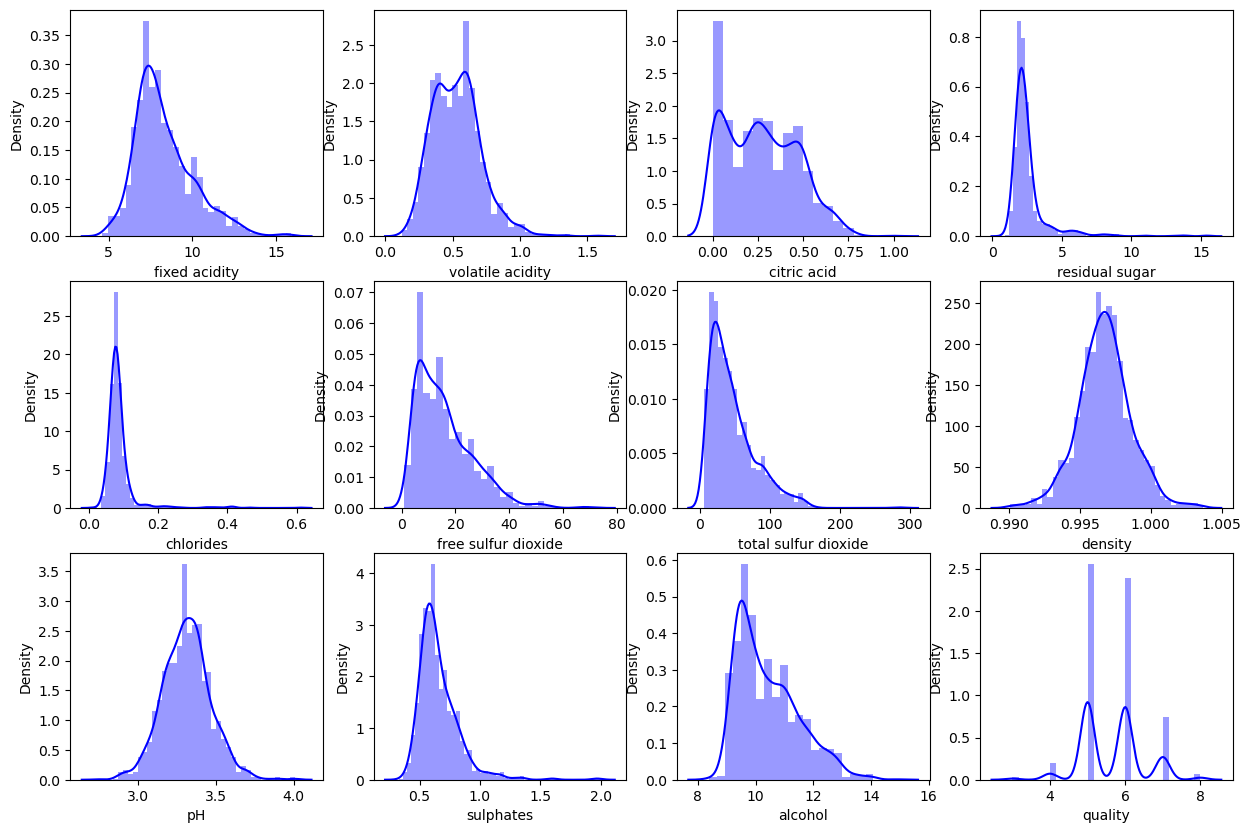

In [8]:
#visualization of data distribution
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in df_wine:
    if plotnumber <= 12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df_wine[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots, we can see that the data looks like normally distributed(showing bell shaped curve) for all the columns except in columns(residual sugar,free sulfur dioxide, total sulfur dioxide,chlorides and sulphate)which seems of outlier presence like earlier in describe summary.
Ignoring the 'quality' column for now as this is our target variable/label.

### Removing outliers using z-score method

In [9]:
from scipy.stats import zscore
z=zscore(df_wine[['residual sugar','free sulfur dioxide','total sulfur dioxide','chlorides','sulphates']])
abs_z=np.abs(z)
df_wine=df_wine[(abs_z<3).all(axis=1)]  #3-std deviation data
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,8.324416,0.527025,0.265304,2.392628,0.081365,15.105404,43.798532,0.996694,3.318259,0.642482,10.451801,5.649099
std,1.749233,0.178184,0.192996,0.876814,0.021718,9.332221,29.461921,0.001852,0.150902,0.130218,1.060996,0.812710
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995565,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.410000,0.720000,11.100000,6.000000
max,15.600000,1.580000,0.790000,6.700000,0.226000,47.000000,145.000000,1.003200,4.010000,1.160000,14.000000,8.000000


#### By comparing with previous describe() method analysis, Now we can see that the outliers has been removed to a great extent.

In [10]:
df_wine.shape

(1499, 12)

Now we can see the outliers has been removed,as previously the row size was 1599.

### Correlation between Each Feature using Heatmap

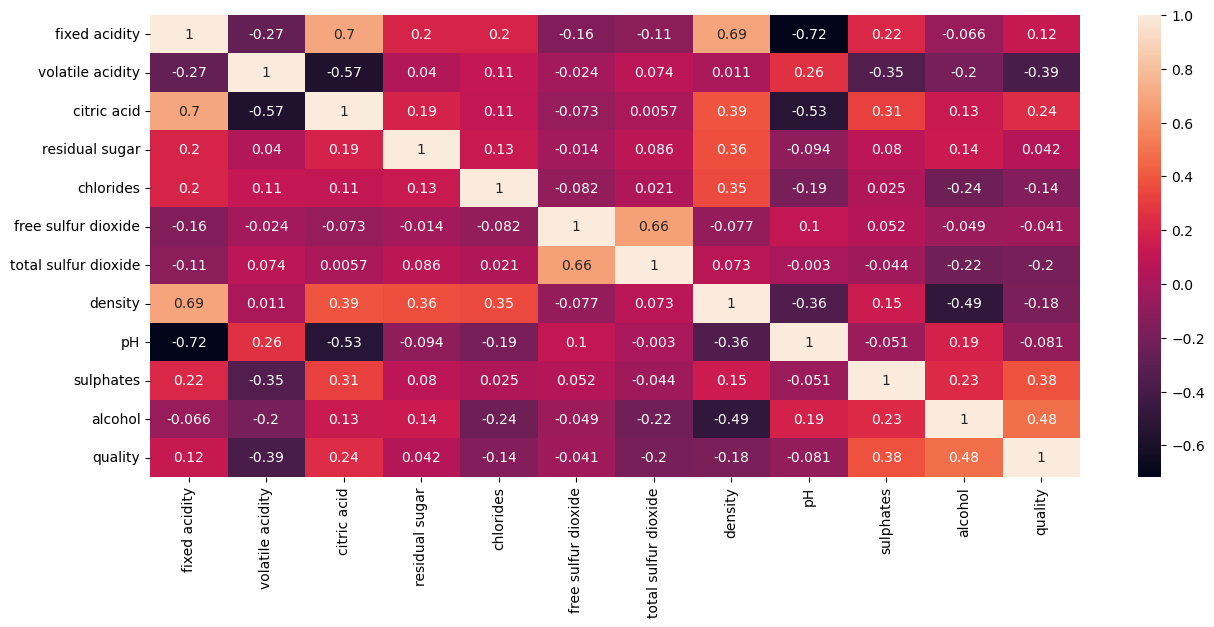

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(df_wine.corr(),annot=True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features.
There is no any strong relationship between features.So there is no multicolinearity issue here.

In [12]:
#Quality Cutoff and thier Counts
df_wine['quality'].value_counts()

5    625
6    604
7    192
4     51
8     18
3      9
Name: quality, dtype: int64

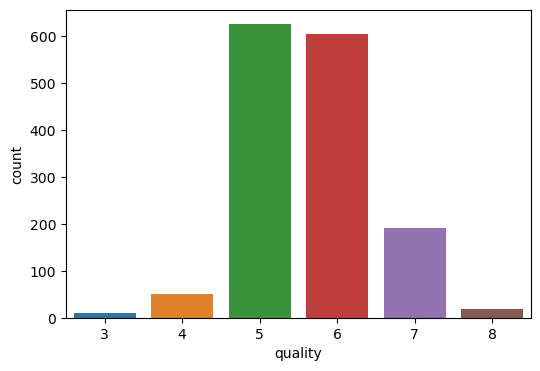

In [13]:
#Visualization
plt.figure(figsize=(6,4))
sns.countplot(df_wine['quality'])
plt.show()

#### As we can see that  the majority of the data rows belongs to the quality cutoff 5 and 6.

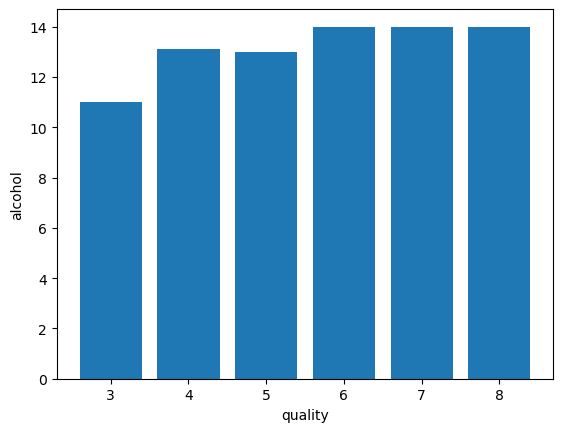

In [14]:
#Visualizing alcohol content with quality
plt.bar(df_wine['quality'], df_wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [15]:
#Setting an arbitrary cut-off for wine quality as given in problem statement
df_wine['quality'] = np.where(df_wine['quality'] >= 7, 1, 0)

#### As instructed in the problem statement setting the value 1 for the wines that are having Quality  value  7 or more than 7, And for the rest of quality values setting 0. Here '1' indicates Good Quality and  '0' Indicates Not Good Quality.

In [16]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [17]:
df_wine['quality'].value_counts()

0    1289
1     210
Name: quality, dtype: int64

#### After Setting the Quality cutoff we can see that the dataset is highly imbalance, we need to do the sampling for the better results.

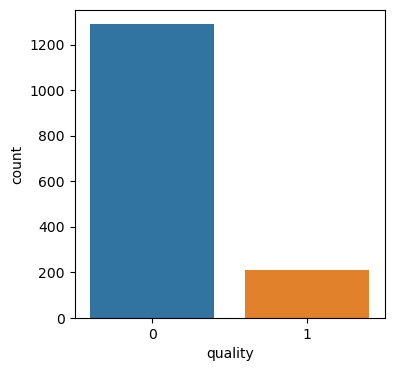

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(df_wine['quality'])
plt.show()

In [19]:
# Dropping the Target column from the Training set.
x = df_wine.drop(['quality'],axis=1)
y = df_wine['quality']

In [20]:
# Oversampling the data.
!pip install imblearn
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [21]:
#Now checking value count of target column
y1.value_counts()

0    1289
1    1289
Name: quality, dtype: int64

#### SMOTE is a oversampling methods to solve the imbalance problem.It aims to balance class distribution by randomly increasing minority class examples by replicating them.

### Splitting the dataset in Train and Test Set. 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=0)

Here using the 80% data for the training set and 20% data for the testing set.

In [23]:
#Standardize our data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one . It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

## Model Building(Classification)

### Desicision Tree Classifier

In [24]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 89%
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       257
           1       0.87      0.92      0.89       259

    accuracy                           0.89       516
   macro avg       0.89      0.89      0.89       516
weighted avg       0.89      0.89      0.89       516

Cross Validation Score: 0.8238729096989965
Difference between Accuracy Score and Cross Validation Score is 0.06566197402193374


####  Here we are getting the 89% accuracy from DecisionTree Classifier.

### Logistic Regression

In [27]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [28]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 81%
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       257
           1       0.78      0.86      0.82       259

    accuracy                           0.81       516
   macro avg       0.81      0.81      0.81       516
weighted avg       0.81      0.81      0.81       516

Cross Validation Score: 0.8692441471571906
Difference between Accuracy Score and Cross Validation Score is -0.06110461227346964


####  Here we are getting the 81% accuracy from Logistic Regression.

### Random Forest Classifier

In [29]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 93%
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       257
           1       0.90      0.98      0.94       259

    accuracy                           0.93       516
   macro avg       0.94      0.93      0.93       516
weighted avg       0.94      0.93      0.93       516

Cross Validation Score: 0.8679197324414716
Difference between Accuracy Score and Cross Validation Score is 0.06425081019418732


####  Here we are getting the 93% accuracy from Random Forest Classifier.

### XGBoost Classifier

In [31]:
model4 = XGBClassifier()
model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
pred = model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model4, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 94%
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       257
           1       0.91      0.97      0.94       259

    accuracy                           0.94       516
   macro avg       0.94      0.94      0.94       516
weighted avg       0.94      0.94      0.94       516

Cross Validation Score: 0.8579085841694537
Difference between Accuracy Score and Cross Validation Score is 0.07813792745845327


####  Here we are getting the 94% accuracy from XGBoost Classifier.

#### Random Forest Classifier looks like our best model as the difference between Accuracy Score and Cross Validation Score is minimum here.

### Hyper Parameter Tuning

In [33]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [34]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [35]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [36]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 20}

In [37]:
Final_model=RandomForestClassifier(criterion = 'entropy',max_depth = 15,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 20)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 88%


In [38]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.8652463768115941
Difference between Accuracy Score and Cross Validation Score is 0.018474553420964046


#### Now we can see the difference is very less.

### ROC AUC Curve

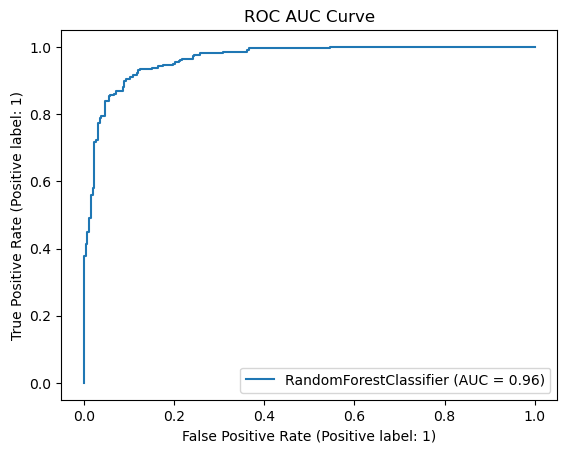

In [39]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()


ROC Curve generated for final model and it shows the AUC score for final model is of 96%.

### Saving the model

In [40]:
import joblib
joblib.dump(Final_model,"redwine_analysis.pkl")

['redwine_analysis.pkl']

Finally saved the best classification model for red wine quality analysis.